In [ ]:
# PAGAMENTO DO BENEFÍCIO DO BOLSA FAMÍLIA (Setembro/2018)

Faculdade: FATEC Jessen Vidal de São José dos Campos
Curso: TBI004 - Projeto de Banco de Dados Não Estruturados (2º semestre de 2018)

Aluno: - Adriel Angelo Ferreira
       - Lilandra Maria de Oliveira
Professor: Me. Fernando Masanori Ashikaga

Dataset: http://www.portaltransparencia.gov.br/download-de-dados/bolsa-familia-pagamentos

In [1]:
import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
# Base de dados dos pagamentos efetuados em setembro/2018 aos beneficiários do bolsa família
filename = '201809_BolsaFamilia_Pagamentos.csv'
df = pd.read_csv(filename, sep=';',encoding='iso-8859-1',decimal=',')

In [3]:
# Verifica as dimensões da base de dados
df.shape

(13863979, 8)

In [4]:
# Exibe uma análise estatística da base de dados
df.describe()

,MÊS REFERÊNCIA,MÊS COMPETÊNCIA,CÓDIGO MUNICÍPIO SIAFI,NIS FAVORECIDO,VALOR PARCELA
count,13863979.0,1.386398e+07,1.386398e+07,1.386398e+07,1.386398e+07
mean,201809.0,2.018090e+05,3.607873e+03,1.721026e+10,1.870651e+02
std,0.0,4.058792e-01,2.728282e+03,3.214415e+09,1.078451e+02
min,201809.0,2.017090e+05,1.000000e+00,1.000053e+10,4.100000e+01
25%,201809.0,2.018090e+05,1.307000e+03,1.605259e+10,1.050000e+02
50%,201809.0,2.018090e+05,3.007000e+03,1.643021e+10,1.710000e+02
75%,201809.0,2.018090e+05,5.869000e+03,2.032891e+10,2.380000e+02
max,201809.0,2.018090e+05,9.997000e+03,2.383371e+10,2.026000e+03


In [5]:
# Exibe um resumo da tabela de dados, com nome/datype  das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863979 entries, 0 to 13863978
Data columns (total 8 columns):
MÊS REFERÊNCIA            int64
MÊS COMPETÊNCIA           int64
UF                        object
CÓDIGO MUNICÍPIO SIAFI    int64
NOME MUNICÍPIO            object
NIS FAVORECIDO            int64
NOME FAVORECIDO           object
VALOR PARCELA             float64
dtypes: float64(1), int64(4), object(3)
memory usage: 846.2+ MB


In [6]:
# Renomeando os nomes das colunas removendo os espaços
df.rename(columns={'MÊS REFERÊNCIA': 'MÊSREFERÊNCIA',
'MÊS COMPETÊNCIA': 'MÊSCOMPETÊNCIA',
'CÓDIGO MUNICÍPIO SIAFI': 'CÓDIGOMUNICÍPIOSIAFI',
'NOME MUNICÍPIO': 'NOMEMUNICÍPIO',
'NIS FAVORECIDO': 'NISFAVORECIDO',
'NOME FAVORECIDO': 'NOMEFAVORECIDO',
'VALOR PARCELA': 'VALORPARCELA'
}, inplace=True)

In [7]:
# Verifica a quantidade de registros
len(df)

13863979

In [8]:
# Verifica a quantidade de registros NIS únicos 
df['NISFAVORECIDO'].nunique()

13738030

In [9]:
# Exibe uma mostra da contagem de registros NIS. 
# Caso houver repetição do mesmo NIS, significa que existe mais de um pagamento no mesmo mês.
df['NISFAVORECIDO'].value_counts().head(5)

23787274339    13
21035440689    13
16369921700    13
16046315620    13
20904319444    12
Name: NISFAVORECIDO, dtype: int64

In [10]:
# Lista as ocorrência de um NIS específico.
# Neste caso nota-se que houve pagamento de vários meses retroativos no mês de competência analisado.
df.query('NISFAVORECIDO == 23787274339')

,MÊSREFERÊNCIA,MÊSCOMPETÊNCIA,UF,CÓDIGOMUNICÍPIOSIAFI,NOMEMUNICÍPIO,NISFAVORECIDO,NOMEFAVORECIDO,VALORPARCELA
4,201809,201709,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
41,201809,201710,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
92,201809,201711,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
147,201809,201712,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
232,201809,201801,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
381,201809,201802,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
628,201809,201803,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
3579,201809,201804,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
10141,201809,201805,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0
27565,201809,201806,PA,1190,MOJUI DOS CAMPOS,23787274339,VANESSA DUARTE FIGUEIRA,294.0


In [11]:
# Como existem registros com NIS repetidos, serão filtrados somente os registros do mês em análise
df=df.query('MÊSCOMPETÊNCIA == 201809')

In [12]:
# Verificação da quantidade de registros únicos
len(df)

13738030

In [13]:
# Exibe uma amostra com 5 registros da base de dados
df.sample(5)

,MÊSREFERÊNCIA,MÊSCOMPETÊNCIA,UF,CÓDIGOMUNICÍPIOSIAFI,NOMEMUNICÍPIO,NISFAVORECIDO,NOMEFAVORECIDO,VALORPARCELA
13393677,201809,201809,SP,7107,SAO PAULO,20995764993,LEANDRA ANDRE FERREIRA,171.0
7823411,201809,201809,PB,1981,CAMPINA GRANDE,20061221702,ANA ROBERTA NEVES DE ARAUJO,82.0
10375166,201809,201809,RJ,2907,GUAPIMIRIM,12825877567,ALINE DA SILVA COSTA,91.0
3156866,201809,201809,CE,1385,CRATO,13617573192,MARIA ZILMARIA DOS SANTOS COSTA LIMA,41.0
4155310,201809,201809,ES,5699,SERRA,12857537079,MIRALVA LIMA DOS SANTOS,194.0


Text(0.5, 1.0, 'Distribuição dos benefiários por estado')

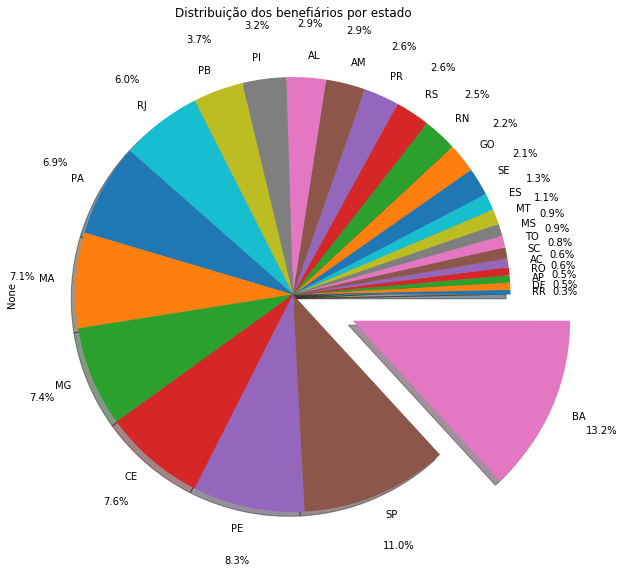

In [14]:
# Gráfico mostrando a participação de cada estado na quantidade de beneficiários
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3]
pie1 = df.groupby('UF').size().sort_values().plot.pie(shadow=True, autopct='%1.1f%%', explode=explode, pctdistance=1.25, figsize=(10,10))
pie1.set_title('Distribuição dos benefiários por estado')

Text(0.5, 1.0, 'Número de beneficiários por Estado')

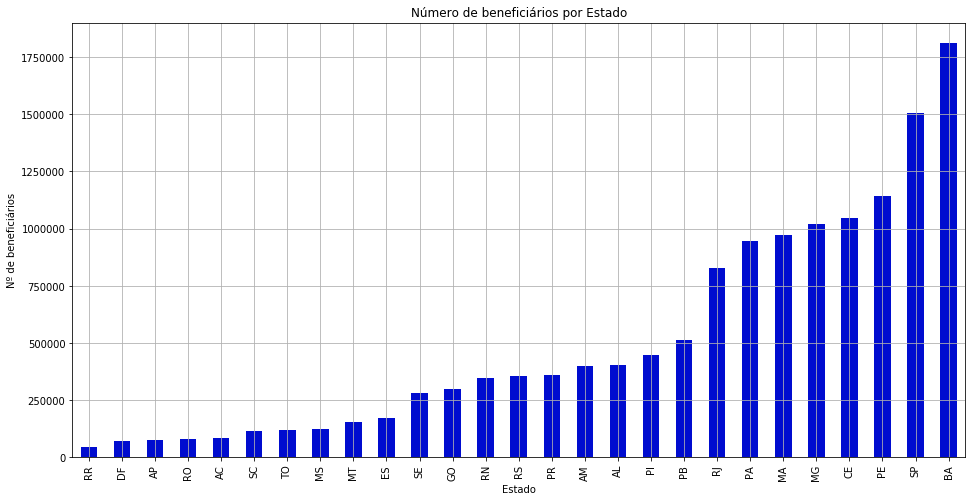

In [15]:
# Número de beneficiários do bolsa família por Estado
plot1 = df.groupby('UF').size().sort_values().plot(kind='bar', label='Quantidade', color='#000ccf', grid=True, figsize=(16,8))
plot1.set_xlabel('Estado')
plot1.set_ylabel('Nº de beneficiários')
plot1.set_title('Número de beneficiários por Estado')

Text(0.5, 1.0, 'Distribuição da receita por estado')

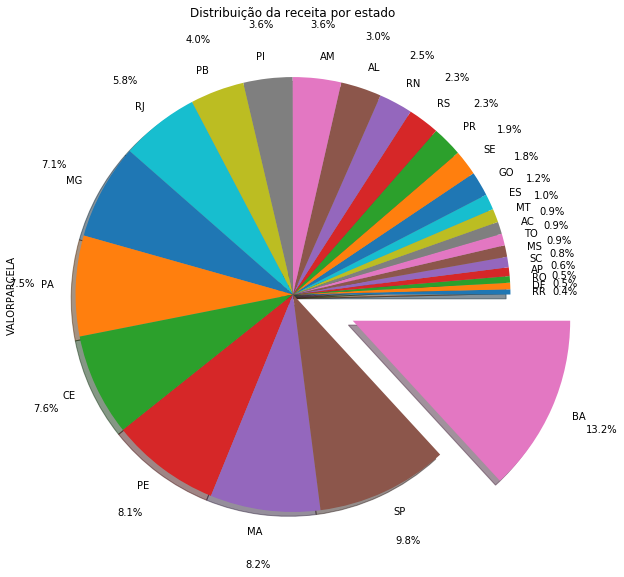

In [16]:
# Gráfico mostrando a participação de cada estado na receita total
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3]
pie1 = df.groupby('UF')['VALORPARCELA'].sum().sort_values().plot.pie(shadow=True, autopct='%1.1f%%', explode=explode, pctdistance=1.25, figsize=(10,10))
pie1.set_title('Distribuição da receita por estado')

Text(0.5, 1.0, 'Valor total dos repasses por Estado')

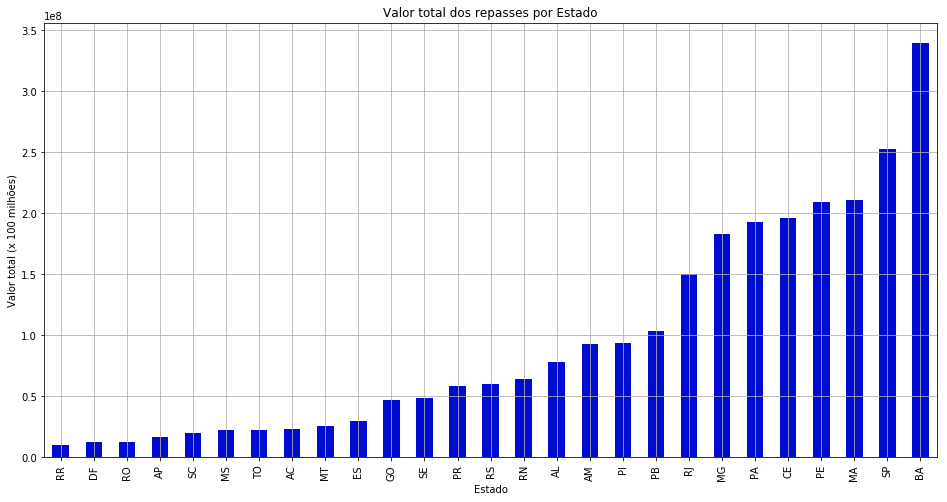

In [17]:
# Número de beneficiários do bolsa família por Estado
plot1 = df.groupby('UF')['VALORPARCELA'].sum().sort_values().plot(kind='bar', color='#000ccf', grid=True, figsize=(16,8))
plot1.set_xlabel('Estado')
plot1.set_ylabel('Valor total (x 100 milhões)')
plot1.set_title('Valor total dos repasses por Estado')

Text(0.5, 1.0, 'Os 20 municípios com maior número de beneficiários')

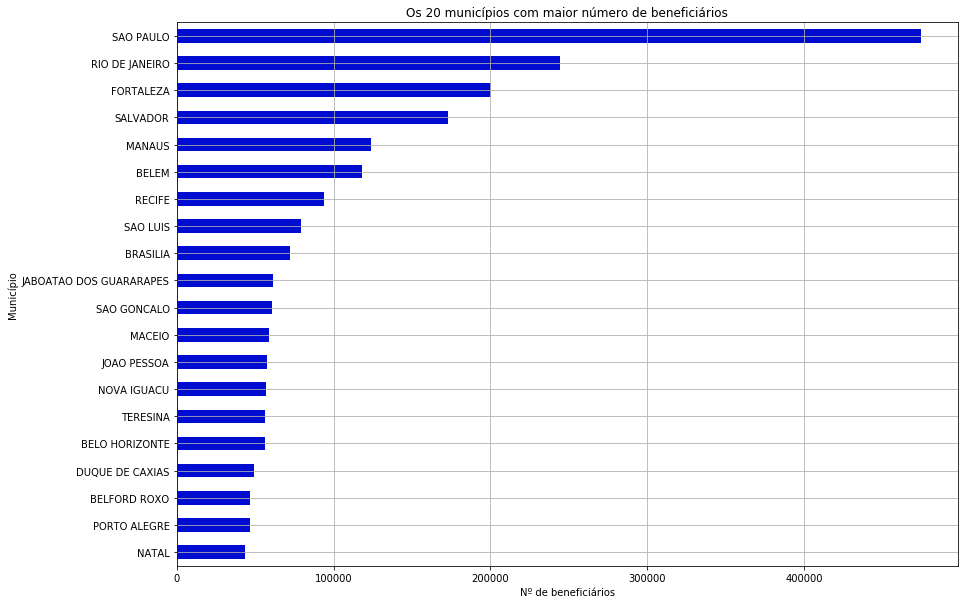

In [18]:
# Número de beneficiários do bolsa família por cidade (20 com maior número de beneficiários)
#
plot2 = df.groupby('NOMEMUNICÍPIO').size().sort_values().tail(20).plot(kind='barh', color='#000ccf',grid=True, figsize=(14,10))
plot2.set_xlabel('Nº de beneficiários')
plot2.set_ylabel('Município')
plot2.set_title('Os 20 municípios com maior número de beneficiários')

Text(0.5, 1.0, 'Municípios que mais receberam repasse')

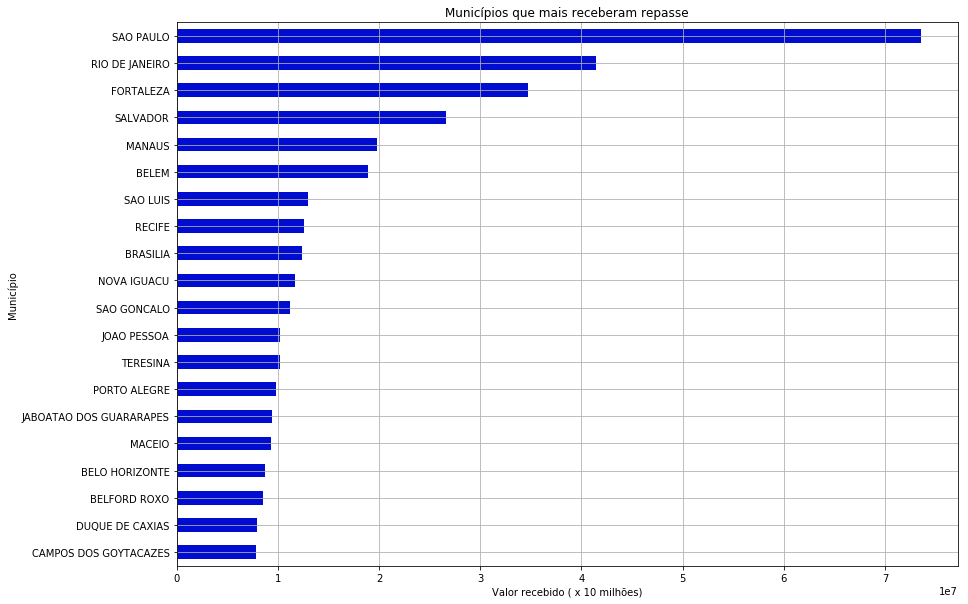

In [19]:
# Soma dos benefícios pagos por cidade (20 com maior número de beneficiários)
#
plot3 = df.groupby('NOMEMUNICÍPIO')['VALORPARCELA'].sum().sort_values().tail(20).plot(kind='barh', sharey=False, grid=True, color='#000ccf',figsize=(14,10))
plot3.set_xlabel('Valor recebido ( x 10 milhões)')
plot3.set_ylabel('Município')
plot3.set_title('Municípios que mais receberam repasse')

Text(0.5, 1.0, 'Média do valor do benefício por Estado')

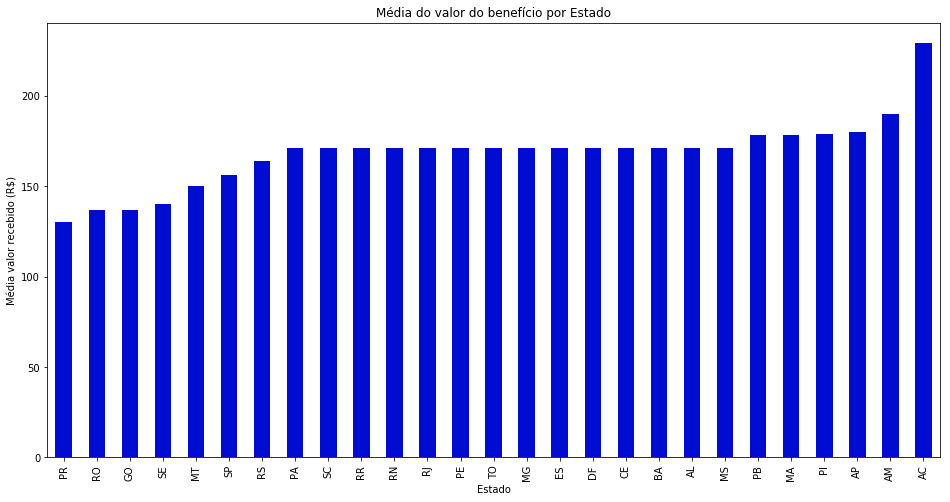

In [20]:
# Média dos valores pagos do benefício por Estado
#
plot4 = df.groupby('UF')['VALORPARCELA'].median().sort_values().plot(kind='bar', color='#000ccf', figsize=(16,8))
plot4.set_xlabel('Estado')
plot4.set_ylabel('Média valor recebido (R$)')
plot4.set_title('Média do valor do benefício por Estado')

In [21]:
# Análise estatística dos valores pagos do benefício
#
df['VALORPARCELA'].describe()

count    1.373803e+07
mean     1.874942e+02
std      1.081348e+02
min      4.100000e+01
25%      1.050000e+02
50%      1.710000e+02
75%      2.390000e+02
max      2.026000e+03
Name: VALORPARCELA, dtype: float64

In [22]:
# Análise estatística dos valores pagos do benefício por Estado
#
df.groupby('UF')['VALORPARCELA'].describe()

,count,mean,std,min,25%,50%,75%,max
UF,,,,,,,,
AC,87008.0,268.292582,160.221271,41.0,170.0,229.0,357.0,1378.0
AL,403236.0,193.235485,107.819374,41.0,130.0,171.0,246.0,1306.0
AM,400210.0,231.623398,138.777533,41.0,130.0,190.0,293.0,1306.0
AP,75038.0,222.732096,128.795655,41.0,130.0,180.0,269.0,1178.0
BA,1810639.0,187.335049,105.798571,41.0,109.0,171.0,238.0,1426.0
CE,1044604.0,187.549914,102.374062,41.0,130.0,171.0,237.0,1276.0
DF,72150.0,172.013167,94.469677,41.0,91.0,171.0,212.0,1070.0
ES,173273.0,172.948088,102.707594,41.0,91.0,171.0,217.0,1094.0
GO,298776.0,157.146555,84.397530,41.0,89.0,137.0,205.0,1248.0


In [23]:
# Percentual do valor total daqueles que recebem até R$ 100
df.query('VALORPARCELA < 100')['VALORPARCELA'].sum()/df['VALORPARCELA'].sum()*100

10.595015632909838

In [24]:
# Quantidade de benefícios maiores que 1 salário mínimo
df.query('VALORPARCELA > 954').shape

(2297, 8)

In [25]:
# Percental de beneficiários que recebem acima de 1 salário mínimo
df.query('VALORPARCELA > 954')['NISFAVORECIDO'].count()/len(df)*100

0.016720010074224616

In [26]:
# Percentual do valor total daqueles que recebem acima de 1 salário mínimo
df.query('VALORPARCELA > 954')['VALORPARCELA'].sum()/df['VALORPARCELA'].sum()*100

0.0925295854753979

In [27]:
# Dados dos beneficiários que receberam valores acima de 1 salário mínimo
#
df[df['VALORPARCELA'] > 954].sort_values(by='VALORPARCELA',ascending=False)

,MÊSREFERÊNCIA,MÊSCOMPETÊNCIA,UF,CÓDIGOMUNICÍPIOSIAFI,NOMEMUNICÍPIO,NISFAVORECIDO,NOMEFAVORECIDO,VALORPARCELA
5312902,201809,201809,MA,921,SAO LUIS,16555102889,RITA DE CASSIA FERNANDES SANTOS,2026.0
5303631,201809,201809,MA,921,SAO LUIS,23807747415,MARIA ZULEIDE MENDES DA SILVA,1916.0
5300986,201809,201809,MA,921,SAO LUIS,23806960093,MARIA JOSE NASCIMENTO SILVA DOS SANTOS,1828.0
13521859,201809,201809,SP,7107,SAO PAULO,12988097404,RAIMUNDO NONATO,1782.0
11453729,201809,201809,RR,301,BOA VISTA,23769605647,MARIA DO SOCORRO GOMES PEREIRA,1782.0
4778061,201809,201809,MA,152,CONCEICAO DO LAGO-ACU,23807323011,ANA FLAVIA DA SILVA,1682.0
5265580,201809,201809,MA,921,SAO LUIS,12130190490,ELIANE MARIA SILVA ABREU,1674.0
4643892,201809,201809,MA,130,BOM LUGAR,23760350697,ARI PALMEIRA,1642.0
5283181,201809,201809,MA,921,SAO LUIS,23806960859,JOSIVALDO MOREIRA FERREIRA,1607.0
13239503,201809,201809,SP,7107,SAO PAULO,23820991820,DAMASIA ROSA,1514.0


Text(0.5, 1.0, 'Quantidade de benefícios pagos acima de 1 salário mínimo')

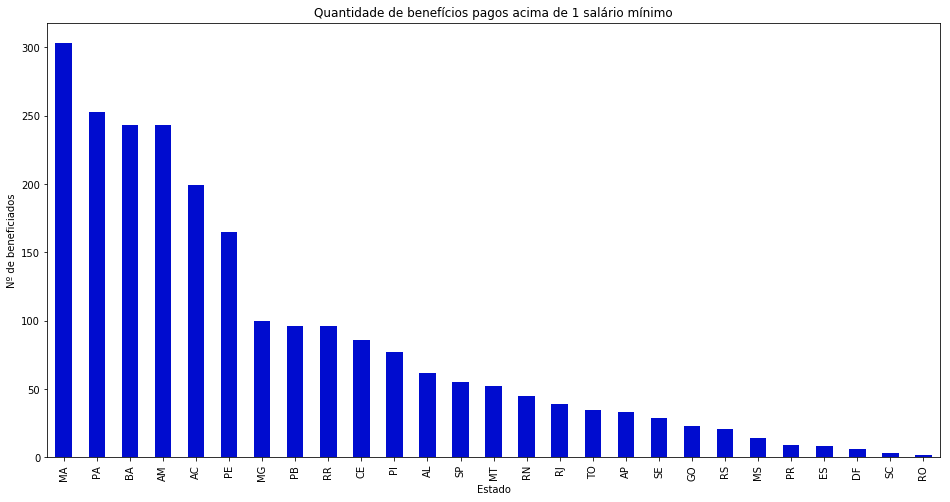

In [28]:
# Quantidade de benefícios pagos com valor acima de 1 salário mínimo, por Estado
#
plot5 = df.query('VALORPARCELA > 954').UF.value_counts().plot(kind='bar', color='#000ccf', figsize=(16,8))
plot5.set_xlabel('Estado')
plot5.set_ylabel('Nº de beneficiados')
plot5.set_title('Quantidade de benefícios pagos acima de 1 salário mínimo')

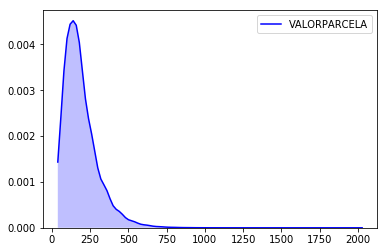

In [30]:
# A análise de distribuição estatística mostra que a grande parte dos benefícios recebidos são inferiores a R$ 250
sb1 = sb.kdeplot(df['VALORPARCELA'], shade=True, bw=.3, color="blue")

In [ ]:
# ANÁLISES
# 1) A Bahia é estado com maior número de beneficiários e valor total de repasses, ambos cerca de 13% do total nacional. 
# 2) O Acre é um dos estados com a menor quantidade de beneficiários, porém é o que tem a maior média do valor da parcela.
# 3) O Maranhão é o sexto estado em número de beneficiários, mas o estado que tem o maior número de famílias que recebem acima de 1 salário mínimo.
# 4) As cidades de São Paulo, Rio de Janeiro, Fortaleza e Salvador estão entre as que tem maior número de beneficiários e por consequencia recebem os maiores repasses de valores.
# 5) A média nacional do valor do benefício é R$ 187, sendo o valor mínimo recebido de R$ 41 e o máximo de R$ 2026.
# 6) Cerca de 2297 famílias recebem valor acima de 1 salário mínimo, equivalente a 0,01% do total de beneficiários e que representa apenas 0,09% do valor total distribuído em benefícios.
